<!--# STAT 207: Data Science Exploration-->
# Regularized Linear Regression and Cross-Validation

Recall the standard data structure for linear regression: We have a data frame of $n$ observations on variables $X_1, X_2, \ldots, X_p, Y$. The variable $Y$ is the **response variable** or **target** of interest, often called an **endogenous** variable. The variables $X_1, X_2, \ldots, X_p$ are **features**, also called **exogenenous** variables. 


| $X_1$ | $X_2$ | $\cdots$ | $X_p$ | $Y$ |
| --- | --- | --- | --- | --- |
| $x_{11}$ | $x_{12}$ | $\cdots$ | $x_{1p}$ | $y_1$ |
| $x_{21}$ | $x_{22}$ | $\cdots$ | $x_{2p}$ | $y_2$ |
| $\vdots$ | $\vdots$ | $\cdots$ | $\vdots$ | $\vdots$ |
| $x_{n1}$ | $x_{n2}$ | $\cdots$ | $x_{np}$ | $y_n$ |


In the machine learning approach, as implemented in Scikit-Learn, we separate them into:

+ Features matrix $X$:

| $X_1$ | $X_2$ | $\cdots$ | $X_p$ |
| --- | --- | --- | --- | 
| $x_{11}$ | $x_{12}$ | $\cdots$ | $x_{1p}$ | 
| $x_{21}$ | $x_{22}$ | $\cdots$ | $x_{2p}$ | 
| $\vdots$ | $\vdots$ | $\cdots$ | $\vdots$ | 
| $x_{n1}$ | $x_{n2}$ | $\cdots$ | $x_{np}$ | 

+ Target array $y$:

| $Y$ |
| --- | 
| $y_1$ |
| $y_2$ |
| $\vdots$ |
| $y_n$ |


If we select multiple linear regression as the model class, we fit a model of the form:

$$
y_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \cdots + \beta_p x_{ip} + e_i, \quad i=1, 2, \ldots, n
$$

### Ordinary Least Squares versus Penalized Least Squares

In the chapter on linear regression analysis we considered ordinary least squares regression. There we fit the above model by minimizing the residual sum of squares as a function of the model coefficients $(\hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_p)$:


\begin{align*}
\mbox{minimize:}\quad &RSS = \sum_{i=1}^n (y_i - \hat{y}_i)^2\\
\mbox{subject to:}\quad 
&\hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_{i1} + \hat{\beta}_2 x_{i2} + \cdots + \hat{\beta}_p x_{ip}\\
\end{align*}

One way to fit this is to use statsmodels.OLS. Abother way, using Scikit-Learn, is to use the sklearn.linear_model.LinearRegression function. We'll see an example below.

If the features matrix contains a large number of variables OLS might not work very well due to overfitting and the uncertainty in estimating so many coefficients. Regularized methods get around this issue by penalizing the overall size of the coefficient vector to reduce variation at the expense of some increase in bias in the estimation. 

We refer to such estiamators as regularized regression estimators. Here are several methods available in Scikit-Learn:

#### Ridge Regression (L2 Penalized Least Squares):

\begin{align*}
\mbox{minimize:}\quad &RSS + \lambda \sum_{j=0}^p \hat{\beta}_j^2\\
\mbox{subject to:}\quad 
&\hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_{i1} + \hat{\beta}_2 x_{i2} + \cdots + \hat{\beta}_p x_{ip}\\
\end{align*}

This is currently implemented as sklearn.linear_model.Ridge.

#### Lasso Regression (L1 Penalized Least Squares):

\begin{align*}
\mbox{minimize:}\quad &RSS + \lambda \sum_{j=0}^p \vert \hat{\beta}_j\vert\\
\mbox{subject to:}\quad 
&\hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_{i1} + \hat{\beta}_2 x_{i2} + \cdots + \hat{\beta}_p x_{ip}\\
\end{align*}

This is currently implemented as sklearn.linear_model.Lasso.

#### Elastic Net Regression (Combined L1 and L2 Penalized Least Squares):

\begin{align*}
\mbox{minimize:}\quad &RSS + \lambda_1 \sum_{j=0}^p \vert \hat{\beta}_j\vert + 
\lambda_2 \sum_{j=0}^p \hat{\beta}_j^2\\
\mbox{subject to:}\quad 
&\hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_{i1} + \hat{\beta}_2 x_{i2} + \cdots + \hat{\beta}_p x_{ip}\\
\end{align*}

This is currently implemented as sklearn.linear_model.ElasticNet.

### Extended example: predicting breast cancer tumor size from gene expression measurements.

In a previous lab exercise, we considered data from a breast cancer followup study on remission of cancer after treatment with tamoxofen. Patients treated for breast cancer were followed for a period of time and diagnosed as having a recurrence of breast cancer (R), or being recurrence free (RF). Various clinical measurements were made including tumor size at the time of treatment. Gene expression was measured for a large number of gene sequences. Here we focus on a sample of 50 gene sequences and study the extent to which these might be predictive of tumr size.

**Note: the analysis here differs from that in Lab 11, where the target was the 0/1 outcome cancer recurrence. Here the target is the continuous measurement tumor size.**

#### Import and clean the data (if necessary)

In [4]:
import pandas as pd
import numpy as np

In [6]:
clin = pd.read_csv("clinical_data.csv")
X = pd.read_csv("gene_expr.csv")
display(X.shape, clin.shape)

(155, 50)

(155, 22)

In [7]:
clin.head()

,Tumor sample,Status,Patient age (years),Adjuvant therapy,Histological type,SBR Grade,Tumor size (mm),pT (TNM),Lymph node checked,N+,...,ER,PR,Follow-up period (months),Local recurrence,Distant metastases,Time before recurrence (months),State of health,Death cause,Decease delay upon recurrence (months),Decease delay after surgery (months)
0,EB5012,RF,75.6,X-ray + Tam,IDC,2.0,13.0,pT1,15,3.0,...,460,28,68.5,NaN,NaN,NaN,deceased,other cause,NaN,68.5
1,EB5015,RF,55.3,X-ray + Tam,IDC,1.0,15.0,pT1,22,1.0,...,39,80,99.9,NaN,NaN,NaN,alive,NaN,NaN,NaN
2,EB5018,RF,64.4,X-ray + Tam,IDC,2.0,15.0,pT1,5,1.0,...,26,83,137.5,NaN,NaN,NaN,alive,NaN,NaN,NaN
3,EB5019,RF,55.4,X-ray + Tam,IDC,1.0,20.0,pT2,9,1.0,...,79,143,142.3,NaN,NaN,NaN,alive,NaN,NaN,NaN
4,EB5020,RF,51.1,X-ray + Tam,IDC,1.0,10.0,pT1,10,2.0,...,26,210,167.4,NaN,NaN,NaN,alive,NaN,NaN,NaN


In [8]:
# Check if missing values in Tumor size column
clin['Tumor size (mm)'].unique()

array([13., 15., 20., 10., 25., 12., 18., 17., 19., 21., 32., 23., 22.,
       14., 11., nan, 30., 35., 58., 28., 16., 50., 40., 43., 45.,  9.,
       29., 31.])

In [9]:
# Since there are missing values we combine X and y data temporarily
# to remove rows with missing values for the response
df = X
df['y'] = clin['Tumor size (mm)']
df = df.dropna()

In [10]:
# separate the 'cleaned' X and y arrays
X = df.iloc[:,:df.shape[1]-1]
y = df['y']
display(X.shape, y.shape, X.head(), y.head())

(150, 50)

(150,)

,X159,X960,X980,X986,X1023,X1028,X1064,X1092,X1103,X1109,...,X1563,X1574,X1595,X1597,X1609,X1616,X1637,X1656,X1657,X1683
0,0.739512,1.971036,-1.660842,2.777183,3.299062,-1.954834,2.784970,0.411848,3.974931,-0.979751,...,3.221117,-1.735267,-2.036134,3.114202,-1.567229,-2.100264,-2.067843,2.116261,-2.057195,-0.868534
1,2.037903,2.197854,-1.263034,4.082346,5.426886,-1.732520,3.085890,0.688056,4.503384,-1.185032,...,2.927229,-1.646363,0.127756,2.772590,-1.451107,0.267480,-1.526069,2.643856,-1.625604,-1.415037
2,2.218338,3.471559,-1.789433,2.829994,4.746466,-2.222392,2.977280,0.944858,4.021099,-1.825502,...,3.565945,-2.296393,-2.347923,3.577213,-2.175087,-2.084889,-2.106915,2.738768,-1.387816,-0.780555
3,0.972344,2.638734,-2.010999,3.913935,4.744161,-2.496426,3.139577,0.155651,4.632121,-1.671513,...,3.815160,-1.706846,-2.216318,3.168707,-1.844349,-2.010999,-1.996352,2.797407,-1.743066,-1.010999
4,2.412235,4.033491,-1.536501,4.239650,4.304348,-1.991067,3.700095,0.878536,4.295705,-2.141092,...,4.264107,-2.424026,-2.448274,3.717911,-2.286523,-2.045515,-1.776328,2.813104,-2.353637,-1.687061


0    13.0
1    15.0
2    15.0
3    20.0
4    10.0
Name: y, dtype: float64

#### Distribution of tumor size

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

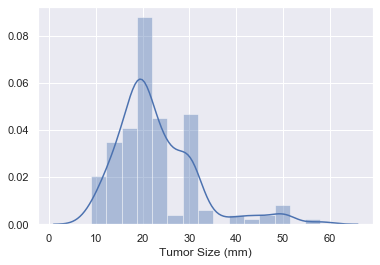

In [12]:
sns.distplot(y)
plt.xlabel("Tumor Size (mm)")
plt.show()

#### Preliminary OLS regression

In [17]:
from sklearn.linear_model import Lasso, LinearRegression

In [16]:
X

,X159,X960,X980,X986,X1023,X1028,X1064,X1092,X1103,X1109,...,X1563,X1574,X1595,X1597,X1609,X1616,X1637,X1656,X1657,X1683
0,0.739512,1.971036,-1.660842,2.777183,3.299062,-1.954834,2.784970,0.411848,3.974931,-0.979751,...,3.221117,-1.735267,-2.036134,3.114202,-1.567229,-2.100264,-2.067843,2.116261,-2.057195,-0.868534
1,2.037903,2.197854,-1.263034,4.082346,5.426886,-1.732520,3.085890,0.688056,4.503384,-1.185032,...,2.927229,-1.646363,0.127756,2.772590,-1.451107,0.267480,-1.526069,2.643856,-1.625604,-1.415037
2,2.218338,3.471559,-1.789433,2.829994,4.746466,-2.222392,2.977280,0.944858,4.021099,-1.825502,...,3.565945,-2.296393,-2.347923,3.577213,-2.175087,-2.084889,-2.106915,2.738768,-1.387816,-0.780555
3,0.972344,2.638734,-2.010999,3.913935,4.744161,-2.496426,3.139577,0.155651,4.632121,-1.671513,...,3.815160,-1.706846,-2.216318,3.168707,-1.844349,-2.010999,-1.996352,2.797407,-1.743066,-1.010999
4,2.412235,4.033491,-1.536501,4.239650,4.304348,-1.991067,3.700095,0.878536,4.295705,-2.141092,...,4.264107,-2.424026,-2.448274,3.717911,-2.286523,-2.045515,-1.776328,2.813104,-2.353637,-1.687061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1.037313,-1.084316,3.636530,0.764423,-0.166778,-0.379772,-1.300045,2.032701,0.473679,3.469135,...,-0.031849,2.531484,2.656651,1.384798,1.094487,2.626363,0.557401,0.935583,1.822574,3.161500
151,1.133431,-0.618910,4.335286,-0.191048,0.128324,0.363812,-0.671377,3.962470,0.406625,3.383235,...,0.512335,3.035897,3.078885,0.948775,1.236700,3.137249,0.661198,0.346325,1.480626,1.664730
152,1.612861,-1.200427,5.036507,-0.074318,-0.353972,-0.393072,-1.172946,2.084975,0.809940,2.818522,...,-0.024350,3.861100,3.932023,2.391455,1.461077,3.947756,0.416546,1.032824,1.608908,3.079987
153,1.204820,-1.413874,4.426671,-0.174298,-0.629302,-0.935110,-2.120142,1.191116,0.567390,2.790792,...,-0.272145,2.330982,2.410664,0.579129,1.039623,2.386818,-0.046142,0.110902,0.640919,2.673042


In [10]:
clf0 = LinearRegression()
clf0.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
clf0.coef_

array([  2.20642824,   5.73645705,  -3.70078376,  -1.52810086,
        -2.55866198,   4.62944497,   3.20100039,  -0.15651285,
         0.8295082 ,  -0.26705349,  -0.84674546,  -0.18454073,
        -5.47570687,  -0.33206248,  -2.9031553 ,   3.7898117 ,
         1.52793373,  -1.75916655,  -1.61799504,   1.33606853,
         0.53881213,  -1.68033748,   1.03572337,  -3.07886961,
         1.89327167,   1.32609532,   1.51691292,   5.13134524,
         1.1803146 ,   1.17031312,  -1.22612368,  -0.42411867,
        -0.80855624,  10.60913493,   0.40534732,  -3.39861693,
        -1.05464182,  -3.17305953,  -0.85560333,   1.42079076,
        -2.86614015,   1.7424332 , -13.64868781,   0.95394073,
         1.8303876 ,   9.92400894,  -1.09894506,  -2.0330619 ,
         0.08022517,   0.58108416])

In [12]:
clf0.intercept_

36.329802484255694

In [13]:
clf1 = Lasso(alpha=0.3, max_iter=1000)
clf1.fit(X, y)

Lasso(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

#### Lasso regression - sparse model coefficients

In [14]:
# Let's have a look at the coefficient estimates
clf1.coef_

array([ 0.        ,  1.57292523, -0.        , -0.        , -1.12071011,
        1.83585391,  0.90318446,  0.00408525, -0.        , -0.66618291,
       -0.        , -0.23909975, -0.76706287, -0.        , -0.43921484,
        0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        , -0.29129979,  0.        ,  0.        , -0.        ,
       -0.        , -0.        ,  0.        , -0.30128854,  0.        ,
       -0.1959114 , -0.        ,  0.        ,  1.35211882,  0.        ,
       -0.3433057 , -0.25661963, -0.68935131, -0.45513361, -0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.10228446,
       -0.        ,  0.        , -0.65530107,  0.        , -0.        ])

In [15]:
# What fraction are nonzero?
tol = 10**(-6)
sum(np.abs(clf1.coef_) > tol)/np.size(clf1.coef_)

0.38

#### Compare OLS and Lasso coefficent estimates

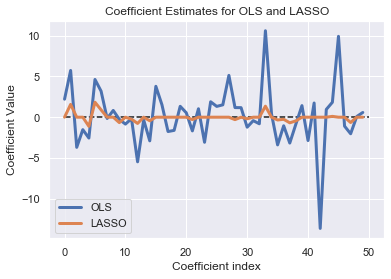

In [16]:
lw=3
plt.plot(np.arange(np.size(clf0.coef_)), clf0.coef_, lw=lw)
plt.plot(np.arange(np.size(clf1.coef_)), clf1.coef_, lw=lw)
#plt.xticks(np.arange(0,20,1))
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient Value')
plt.title('Coefficient Estimates for OLS and LASSO')
plt.legend(['OLS','LASSO'], loc='lower left')
plt.hlines(y=0, xmin=0, xmax=50, linestyles='--')
plt.show()

### Cross-validation analysis of predictive accuracy

We don't know the true values for the coefficients. We can, however, use k-fold cross-validation to compare the predictive performance of the two estimators.

**Why do we need cross-validation? Why not just compare the residual sum of squares for the two models?**

**Problem:** OLS minimizes RSS directly, so it will always have better within-sample RSS. To avoid this bias we need to do out-of-sample RSS, using the train/test approach. 


#### Out-of-sample predictive accuracy

Instead of residual sum of squares we'll use the out-of-sample mean square prediction error. 

+ First we split the data into train and test sets. 


+ Next, we fit the model using one of the methods described above using training data only. This gives us coefficient estimates:

\begin{equation}
(\hat{\beta}_{train,0}, \hat{\beta}_{train,1}, \ldots, \hat{\beta}_{train,p})
\end{equation}

+ Next, we obtain the predicted values for the test data based on teh training model:

\begin{equation}
\hat{y}_{test, i} = \hat{\beta}_{train,0} + \hat{\beta}_{train,1} * x_{test,i1} +
\cdots + \hat{\beta}_{train,p} * x_{test,ip}
\end{equation}

+ Compute out-of-sample mean square error is

\begin{equation}
MSE_{test} = {1\over n_{test}} \sum_{i=1}^{n_{test}} (y_{test,i} - \hat{y}_{test,i} )^2
\end{equation}

#### K-fold cross validation

Dividing the data into $k$ random subsets, we can then cycle through each of the resulting train/test splits and compute the out of sample MSE's. The way this works is that each of the $k$ subsets is used once as the test set, with the other $k-1$ subsets used for training. The process repeats $k$ times to produce $k$ different "scores". Averaging the scores over the $k$ train/test splits leads to an improved overall estimate of predictive accuracy.

The Scikit-Learn function cross_val_score implements this as the scoring method:

            neg_mean_squared_error = - MSE_test


Why? It makes higher scores "better" in that they correspond to smaller MSE.

If 'cv=k' is selected, $k$ different values of neg_mean_squared_err will be computed based on the $k$ splits of the data.

#### Using the Scikit-Learn function cross_val_score

In [17]:
from sklearn.model_selection import cross_val_score

In [18]:
# OLS Negative MSE for prediction
modclass0 = LinearRegression()
scores0 = cross_val_score(modclass0, X, y, cv=5, 
                          scoring="neg_mean_squared_error")
display(scores0, np.mean(scores0))

array([-224.87305851, -125.45118196, -117.67760614,  -79.61891434,
        -91.90508918])

-127.9051700255314

In [19]:
modclass1 = Lasso(alpha=0.3, max_iter=1000)
scores1 = cross_val_score(modclass1, X, y, cv=5, 
                          scoring="neg_mean_squared_error")
display(scores1, np.mean(scores1))

array([ -52.00450159, -105.81602909, -104.74790139,  -72.53890058,
        -69.78054464])

-80.9775754568175

Conclusion: We see that L1 penalized regression has much better predictive accuracy in this example than OLS regression.

#### Estimated predictive accuracy

The average test MSE gives us a rough idea of how close the model predictions are expected to be to the actual values. For the Lasso, the estimated MSE was 81.0, which translates to a standard deviation for prediction of 9.0. We would therefore predict with approximate 95% confidence that the actual tumor size measurement would be within +/- 18.0 mm of the predicted value based on the gene expression measurements.

Comparing to the marginal distribution of tunor sizes above, this seems only a small gain in precision using these 50 gene expression values. Using more advanced methods, we might be able to use all of the gene expression values, not just a sample of 50, to do a better job of predicting tumor size from gene expression measurements. 

### Selecting the tuning parameter

To use a regularization method like the Lasso, we need to set the value of the tuning parameter that determines how much weight to give to the penalty function in fitting the model. how much impact does this have?

**Example:** Let's experiment with different settings in the breast cancer example, using gene expression features to predict tumor size.

In [20]:
# Several settings for alpha
mod000 = LinearRegression()
mod025 = Lasso(alpha=0.25, max_iter=1000)
mod050 = Lasso(alpha=0.50, max_iter=1000)
mod075 = Lasso(alpha=0.75, max_iter=1000)
mod100 = Lasso(alpha=1.00, max_iter=1000)
mod300 = Lasso(alpha=3.00, max_iter=1000)

In [21]:
# Fit the models
mod000.fit(X, y)
mod025.fit(X, y)
mod050.fit(X, y)
mod075.fit(X, y)
mod100.fit(X, y)
mod300.fit(X, y)

Lasso(alpha=3.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [22]:
# compare numbers of nonzero coefficients
tol = 10**(-6)
perf_table = pd.DataFrame({
    'alpha': [0.00, 0.25, 0.50, 0.75, 1.00, 3.00],
    'nonzero_coefs': [
        np.sum(np.abs(mod000.coef_) > tol),
        np.sum(np.abs(mod025.coef_) > tol),
        np.sum(np.abs(mod050.coef_) > tol),
        np.sum(np.abs(mod075.coef_) > tol),
        np.sum(np.abs(mod100.coef_) > tol),
        np.sum(np.abs(mod300.coef_) > tol)]
    })
perf_table

,alpha,nonzero_coefs
0,0.00,50
1,0.25,18
2,0.50,12
3,0.75,6
4,1.00,7
5,3.00,1


In [23]:
# Compare cv scores
perf_table['NegMSE'] = [
    cross_val_score(mod000, X, y, cv=5, scoring="neg_mean_squared_error").mean(),
    cross_val_score(mod025, X, y, cv=5, scoring="neg_mean_squared_error").mean(),
    cross_val_score(mod050, X, y, cv=5, scoring="neg_mean_squared_error").mean(),
    cross_val_score(mod075, X, y, cv=5, scoring="neg_mean_squared_error").mean(),
    cross_val_score(mod100, X, y, cv=5, scoring="neg_mean_squared_error").mean(),
    cross_val_score(mod300, X, y, cv=5, scoring="neg_mean_squared_error").mean()]
perf_table['RMSE'] = np.sqrt(np.abs(perf_table['NegMSE']))
perf_table

,alpha,nonzero_coefs,NegMSE,RMSE
0,0.00,50,-127.905170,11.309517
1,0.25,18,-81.034117,9.001895
2,0.50,12,-80.747123,8.985940
3,0.75,6,-78.908112,8.883024
4,1.00,7,-78.369937,8.852680
5,3.00,1,-79.173781,8.897965


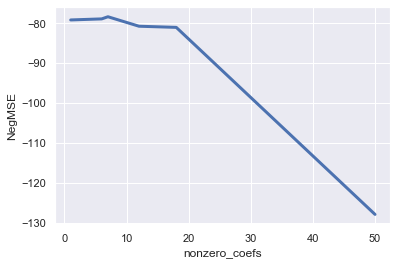

In [24]:
sns.lineplot(x='nonzero_coefs', y='NegMSE', data=perf_table, lw=3)
#plt.ylim(top=0)
plt.show()

**Remarks:**

+ The penalty tuning parameter alpha has a big effect on the sparsity of the model; larger values of alpha place greater constraints on how many coefficients can be nonzero.


+ Among these choices, alpha = 1.00, with 7 nonzero variables gives the smallest value for cross-validated mean-square-error.


+ The differences on MSE are relatively small, as the root-mean-square error values range only from 8.9 to 9.0. Even the one-variable model does almost as well as the 18 variable model.


+ All of the sparse Lasso fits improve dramatically on the OLS fit with 50 variables.


### Automated tuning parameter selection using cross-validation

Using the Scikit learn module, LassoCV, provides a useful tool for using cross-validation to compare performance across a range of values for the tuning parameter alpha.

In [25]:
from sklearn.linear_model import LassoCV

In [26]:
model = LassoCV(cv=5, alphas=[0.25, 0.50, 0.75, 1.00, 2.00, 3.00]).fit(X, y)

(0.11249999999999999, 3.1375, 45.037369754620805, 115.18853264252837)

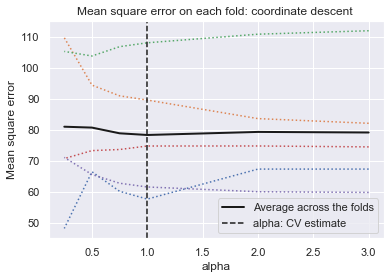

In [27]:
# Display results
plt.figure()
plt.plot(model.alphas_, model.mse_path_, ':')
plt.plot(model.alphas_, model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(model.alpha_, linestyle='--', color='k',
            label='alpha: CV estimate')
plt.legend()
plt.xlabel('alpha')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: coordinate descent ')
plt.axis('tight')

**Conclusion:** The optimum value is estimated to be near alpha = 1. We can also see that the train/test MSE paths for each "fold", that is for each of the 5 train/test splits of the data. The large variation between optimal alpha values between different folds suggests that the best alpha is highly variable. We can't put too much confidence in the best value for these data. Conversely, this means that the choice of alpha is not critical within the range considered.

#### Displaying the results of the final model

In [28]:
model.coef_

array([-0.        ,  0.        ,  0.        , -0.        , -0.4449253 ,
        0.08993896,  0.        ,  0.00678522, -0.        , -0.        ,
        0.        , -0.41695898, -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.        ,
        0.        , -0.18317027, -0.        , -0.05873826, -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.21900174,  0.        ,
       -0.        ,  0.        ,  0.        , -0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ])

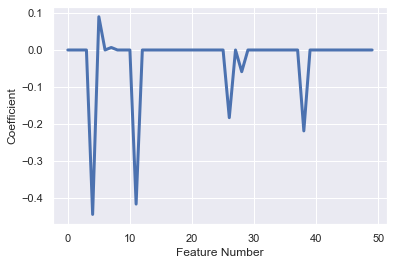

In [29]:
plt.plot(np.arange(np.size(model.coef_)), model.coef_, lw=lw)
plt.xlabel('Feature Number')
plt.ylabel('Coefficient')
plt.show()

### Visualizing the raw data

Visualizing the data with so many feature varaibles poses a challenge, particularly in how to represent the relationsships between the target labels in $y$ and all the features in $X$. In the classification setting we used a heat map to compare the mean X vectors for the two groups represented by $y$.

In the current example. $y$ (tunor size) is a continuous target. How to display these values versus the $X$ features? With fewer variables we could make scatter plots of $y$ versus the $X$ features. With 50 that is not practical. 

One rough and ready method is to bin the values of $y$ into several ordered categories. Then we can make a heat map of the binned values versus the mean $X$ values for each bin.

#### A binned heat map

Let's bin the tumor sizes into 5 groups based on quantiles of the size distribution.

In [30]:
# Compute the quintiles of tumor size
quints = []
for q in [0.2, 0.4, 0.6, 0.8]:
    quints.append(y.quantile(q=q))
quints

[17.0, 20.0, 22.39999999999999, 30.0]

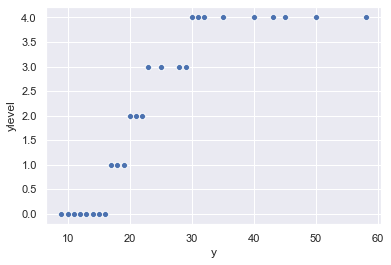

In [31]:
# create size categories by thresholding at the quintiles
ylevel = y*0
level = 0
for cut in quints:
    level = level + 1
    ylevel[y >= cut] = level
# display the results
sns.scatterplot(y, ylevel)
plt.ylabel('ylevel')
plt.show()

In [32]:
# create matrix of within group means
mean_matrix = np.array((
    X[ylevel==0].mean(), 
    X[ylevel==1].mean(),
    X[ylevel==2].mean(), 
    X[ylevel==3].mean(),
    X[ylevel==4].mean()
))

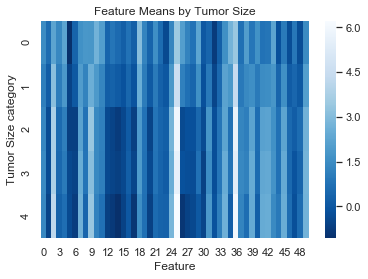

In [33]:
sns.heatmap(mean_matrix, annot=False, linewidths=0, 
            square = False, cmap = 'Blues_r');
plt.ylabel('Tumor Size category');
plt.xlabel('Feature');
all_sample_title = 'Feature Means by Tumor Size'
plt.title(all_sample_title, size = 12);
plt.show()

By scanning the different columns we may check whether any of the features exhibit trends across different tumor size categories. 

#### Screening feature variables

It can be useful to screen variables in advance by computing the individual slopes of each X variable on y or vice versa. There are other possibilities, for example, plotting coefficient t test statistics or sample correlations. Let's plot the correlations. Then we can visualize the relations by graphing slopes versus coefficient number. 

In [34]:
# get all the correlations between X features and y
df = X; df['y']=y
corrxy = df.corr()['y'][:df.shape[1]-1]
display(corrxy.shape, corrxy.head())

(50,)

X159    -0.044613
X960    -0.212010
X980     0.244669
X986    -0.244490
X1023   -0.287543
Name: y, dtype: float64

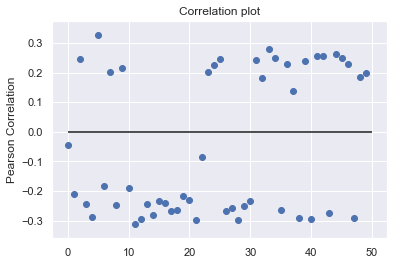

In [35]:
plt.scatter(np.arange(np.size(corrxy)), corrxy)
plt.ylabel('Pearson Correlation')
plt.title("Correlation plot")
plt.hlines(y=0, xmin=0, xmax=50)
plt.show()

Nothing jumps out here. the common correlation across gene levels suggests that they may all be moving more or less together, with no particular genes among this group is dominant in having a strong association with tumor size. The optimal model selects a subset of variables that represents the relationship about as well as the entire group.

---
STAT 207, Douglas Simpson, University of Illinois at Urbana-Champaign